# Basismodul Computerlinguistik
### Übung


Yannick Kaiser \
Y.Kaiser@campus.lmu.de

### Heute

- Perfect Hashing
  - Zusatzinformationen Speichern
  - Hashing
  - Perfect Hashing

## Perfect Hashing

> Oder: Wir wir mit dem Lexikonautomaten effizient Zusatzinformationen zu den Wörtern speichern können

### Zusatzinformationen Speichern

Wenn in einem **Lexikon** zu allen Wörtern Zusatzinformationen gespeichert werden sollen, brauchen wir ein 'Nachschlagwerk'.

Angenommen, wir wollen die **Frequenz** und den **Part of Speech** der Wörter speichern...

```
WORT                 FREQUENZ              POS
-----------------------------------------------
Apfel                   72                 NN
behäbig                 14                 ADJ
zebrastreifen           56                 VB
...
```


Wie könnten wir so eine Tabelle in Python darstellen?

```python
information = {
    'Apfel': (72,'NN'), 
    'behäbig': (14,'ADJ'), 
    'zebrastreifen': (56,'VB')
}
```


Einfachste Lösung: ```dict``` (*= HashMap in Python*)


### Hashing

Hashing ist eine Methode zum **Schlüssel-Wert**-Paare zu speichern und wieder auf sie zuzugreifen.

Eine **Tabelle oder Matrix** enthält die Informationen zeilenweise gespeichert:
```
   ┌────────┬──────────────┐
   │ Zeile  │ Information  │
   ├────────┼──────────────┤
   │   0    │     data     │
   │  ...   │     ...      │
   │   7    │     data     │
   │  ...   │     ...      │
   │   n    │     data     │
   └────────┴──────────────┘
```

Eine **Hash-Funktion** rechnet aus dem **Schlüssel** die zugehörige **Zeile** aus:

```python
def hash(key):
    return do_some_math(key)
```

Beispiel für eine Hash-Funktion für **Wörter**:
```python
def my_hash(word):
    return len(word)
```

```python
>>> my_hash("der");
3
>>> my_hash("das")
3
```
Hash-Funktionen sind i.A. **nicht perfekt**:
- Verschiedene Schlüssel können den gleichen Hash-Wert haben
  - Dann müssen mehrere Daten in einer Tabellenzeile gespeichert werden ("Bucket")
- Nicht alle Tabellenzeilen kommen als Ergebnisse der Funktion vor
  - Dann hat die Tabelle lücken und ist größer als sie sein müsste

Moderne Hash-Verfahren verwenden Heuristiken und gut ausgewählte Hash-Funktionen, um diese Probleme zu minimieren.

```python
information = {
    'Apfel': (72,'NN'), 
    'behäbig': (14,'ADJ'), 
    'zebrastreifen': (56,'VB')
}
```


Einfachste Lösung: ```dict``` (*= HashMap in Python*)


**Vorteile:**
- Schneller Lookup durch Hash-Funktion: O(1)
- Einfach zu implementieren

**Nachteile:**
- Muss jeden Hash/jedes Wort Speichern: O(n) 
- Muss Speicherplatz 'bereit halten'

Wir haben den **Trie** als platzsparende Speichermethode für Wortlisten kennengelernt:

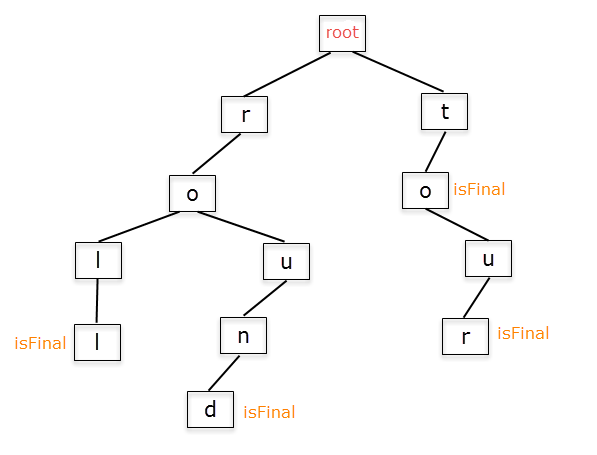

Wie können im Trie Zusatzinformationen zu jedem Wort gespeichert werden?

- Jedes Wort hat einen eigenen Finalzustand
- Der Finalzustand kann auf die Informationen zeigen
- Ist eine Form von Hashing: Die ID des Finalzustandes ist ein eindeutiger Hashwert
  - Damit kann dann eine einfache Lookup-Matix / Tabelle erstellt werden: Wort -> ID -> Daten
  - Die ID kann implizit die Zeile der Tabelle sein: Kein Speicherbedarf für diese Tabellenspalte

**Lookup-Matrix für Trie mit 3 Finalzuständen:**

```
    ┌────────┬──────────────┐
    │Frequenz│Part-of-Speech│
    ├────────┼──────────────┤
0.  │   72   │      NN      │
1.  │   14   │      ADJ     │
2.  │   56   │      VB      │
    └────────┴──────────────┘
```

**Implementation mit Hashwert und 'Tabelle':**

```python
# Daten für Zustand i an Stelle i
table = [(14,'VBZ'),..] 
trie = Trie(wordlist)
class TrieState():
    # ...
    def get_unique_ID(self):
    # ...
    
freq, POS = table[trie.walk(word).get_unique_ID()]
```

Hinweis: Nur dann effizient, wenn die Finalzustands-IDs monoton von 0 an wachsen und keine Lücken beinhalten!

**Implementation mit Instanzvariable:**
```python
trie = Trie(wordlist)
class TrieState():
    # ...
    def set_data(self,data):
    # ...
    def get_data(self):
    # ...
    
freq, POS = trie.walk().get_data()
```

**Vorteile:**
- Schneller Lookup durch Traversieren-Funktion: O(1) für normale Wörter
- Relativ einfach zu implementieren
- Relativ kleiner Specherbedarf durch gemeinsame Präfix-Pfade

**Nachteile**:
- Relativ großer Speicherbedarf durch individuelle Suffix-Äste

### Perfect Hashing

- Jedes Element muss einen eindeutigen Hash-Wert bekommen
- Hash-Tabelle darf keine Lücken haben (einschließlich am Ende!)

War die implementation auf dem **Trie** bereits Perfect Hashing?


Ja.
- Jedes Wort hat einen eindeutigen Hash-Wert: Die einzigartige Zustands-ID
- Wir haben die IDs lückenlos von 0 steigen lassen, sodass die Liste keine Lücken hat
- Alternativ haben wir Instanzvariablen verwendet

Wir haben also eigentlich nur die Wörter im Trie durchnummeriert, und der Finalzustand hat uns diese Zahl geliefert.

```python
def my_hash(word):
    final_state = trie.walk(word)
    return final_state.get_ID()
```

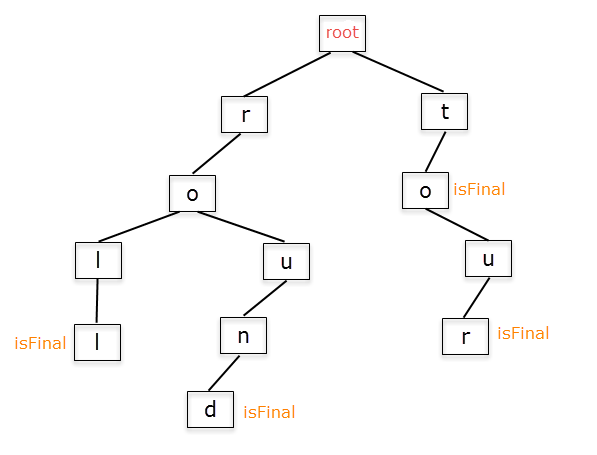

```
roll  -> 0
round -> 1
tour  -> 2

[data,data,data]
```

In der Vorlesung haben wir als nächstes den Trie verbessert und den **minimalen Lexikonautomaten** eingeführt:

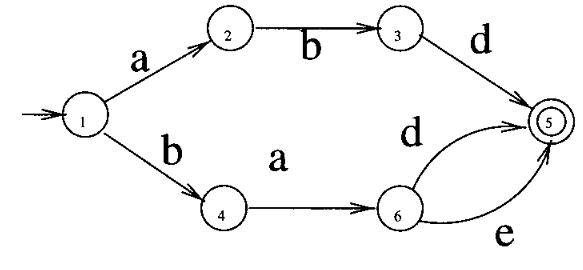

**Problem:** \
Wir können jetzt nicht mehr einfach an jedem Finalzustand die Informationen speichern - alle Wörter zeigen auf den gleichen Finalzustand!

Wir müssen den Hashwert des Wortes also aus dem Automaten **rekonstruieren**. \
Das Ziel ist, dass jedes Wort seine Position in der sortierten Liste aller Wörter als Hashwert erhält.

Dann haben wir Perfekt Hashing:
- Alle Wörter haben einen einzigartigen Hashwert
- Die Tabelle muss nur so viele Zeilen haben, wie es Wörter gibt
- Der Hashwert kann direkt zum Nachschlagen in der Tabelle benutzt werden (Hashwert = Zeile der Tabelle)


**Grundidee:**

```
wortliste = sortierte Liste aller Wörter im Lexikon
hash(w) = position in wortliste 
        = Anzahl der Wörter oberhalb von w in wortliste 
```


```
wortliste = [
  0 das
  1 der
  2 die
]
```

**Grundidee:**

Wenn wir für einen Lexikon-Automaten A den Hashwert für ein Wort w aus dem Automaten wollen, dann müssen wir auf dem Weg durch den Automaten **mitzählen**, wieviele Wörter **alphabetisch** vor w existieren.

Dazu führen wir 2 Kennzahlen ein:
- **Zustandszahlen** entsprechen der Größe der **Rechtssprache** eines Zustands
- **Label-Zahlen** entsprechen der Menge an mit diesem Überhang **übersprungenen**, alphabetisch kleineren, Wörter.

> An die Tafel!

**Zustandszahlen**

Sei $z(q)$ die Zustandszahl an Zustand $q$ mit Nachfolgezuständen $p_0$ bis $p_n$. 

Sei weiterhin $f(q) = 1$, falls $q$ final ist, ansonsten $0$.

Dann ist $ z(q) = f(q) + \sum_{i = 0}^{n} z(p_i) $

**Labelzahlen**

Sei $\sigma$ das Label eines Überganges von Zustand $q$, und seien $\nu_i$ die Label der alphabetisch kleineren Übergänge von $q$ auf einen Zustand $p_i$. 

Sei $f(q)$ definiert wie oben.

Dann ist die Labelzahl $l(q,\sigma) = f(q) + z(p_i), \text{ f.a. } p_i = \delta(q,\nu_i)$

**Hashwert eines Wortes**

Will man nun den Hashwert eines Wortes berechnen, so muss man nur beim traversieren durch den Automaten die Labelzahlen mitzählen - die Summe aller übersprungenen, alphabetisch kleineren Wörter im Automaten ist die Position des Wortes in der Wortliste, und damit genau der **Perfect Hash Value**.

In [ ]:
def the_end():